Problem Statement

Researchers have access to large online archives of scientific articles. As a consequence, finding relevant articles has become more and more difficult. Tagging or topic modelling provides a way to give clear token of identification to research articles which facilitates recommendation and search process. 

Earlier on the Independence Day we conducted a Hackathon to predict the topics for each article included in the test set. Continuing with the same problem, In this Live Hackathon we will take one more step ahead and predict the tags associated with the articles.

Given the abstracts for a set of research articles, predict the tags for each article included in the test set. 
Note that a research article can possibly have multiple tags. The research article abstracts are sourced from the following 4 topics: 

1. Computer Science

2. Mathematics

3. Physics

4. Statistics

List of possible tags are as follows:

[Tags, Analysis of PDEs, Applications, Artificial Intelligence,Astrophysics of Galaxies, Computation and Language, Computer Vision and Pattern Recognition, Cosmology and Nongalactic Astrophysics, Data Structures and Algorithms, Differential Geometry, Earth and Planetary Astrophysics, Fluid Dynamics,Information Theory, Instrumentation and Methods for Astrophysics, Machine Learning, Materials Science, Methodology, Number Theory, Optimization and Control, Representation Theory, Robotics, Social and Information Networks, Statistics Theory, Strongly Correlated Electrons, Superconductivity, Systems and Control]


Import libraries


In [39]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load and read files

In [40]:
#read files
#Reading train file:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/research_Train.csv')
#Reading test file:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/research_Test.csv')
#Reading sample submission file:
sample_sub = pd.read_csv('/content/drive/My Drive/Colab Notebooks/research_SampleSubmission.csv')
#Reading tags file:
tags = pd.read_csv('/content/drive/My Drive/Colab Notebooks/research_Tags.csv')

In [41]:
train

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,8699,a methodology of automatic detection of a even...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14000,11912,we consider a case inside which the robot has ...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14001,4842,despite being usually considered two competing...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
14002,12507,we present the framework and its implementatio...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
test

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,9409,fundamental frequency (f0) approximation from ...,0,0,0,1
1,17934,"this large-scale study, consisting of 24.5 mil...",1,0,0,1
2,16071,we present a stability analysis of the plane c...,0,0,1,0
3,16870,we construct finite time blow-up solutions to ...,0,1,0,0
4,10496,planetary nebulae (pne) constitute an importan...,0,0,1,0
...,...,...,...,...,...,...
5997,11506,a first step inside constructing the machine l...,0,0,0,1
5998,3418,a focus of this paper was to quantify measures...,1,0,0,0
5999,7369,as autonomous vehicles become an every-day rea...,1,0,0,0
6000,8421,a hamiltonian monte carlo (hmc) method has bee...,0,0,0,1


In [43]:
tags

,Tags
0,Analysis of PDEs
1,Applications
2,Artificial Intelligence
3,Astrophysics of Galaxies
4,Computation and Language
5,Computer Vision and Pattern Recognition
6,Cosmology and Nongalactic Astrophysics
7,Data Structures and Algorithms
8,Differential Geometry
9,Earth and Planetary Astrophysics


In [44]:
sample_sub

,id,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,9409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,11506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5998,3418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5999,7369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6000,8421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Check for null values

In [45]:
train.isnull().sum()

id                                              0
ABSTRACT                                        0
Computer Science                                0
Mathematics                                     0
Physics                                         0
Statistics                                      0
Analysis of PDEs                                0
Applications                                    0
Artificial Intelligence                         0
Astrophysics of Galaxies                        0
Computation and Language                        0
Computer Vision and Pattern Recognition         0
Cosmology and Nongalactic Astrophysics          0
Data Structures and Algorithms                  0
Differential Geometry                           0
Earth and Planetary Astrophysics                0
Fluid Dynamics                                  0
Information Theory                              0
Instrumentation and Methods for Astrophysics    0
Machine Learning                                0


In [46]:
test.isnull().sum()

id                  0
ABSTRACT            0
Computer Science    0
Mathematics         0
Physics             0
Statistics          0
dtype: int64

Graphically Represent Data

In [47]:
computer = train.groupby('Computer Science')['Computer Science'].sum()
computer/len(train)*100

Computer Science
0     0.000000
1    42.016567
Name: Computer Science, dtype: float64

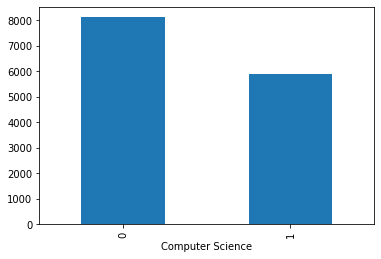

In [48]:
train.groupby('Computer Science').ABSTRACT.count().plot.bar(ylim=0)
plt.show()

In [49]:
math = train.groupby('Mathematics')['Mathematics'].sum()
math/len(train)*100

Mathematics
0     0.000000
1    20.215653
Name: Mathematics, dtype: float64

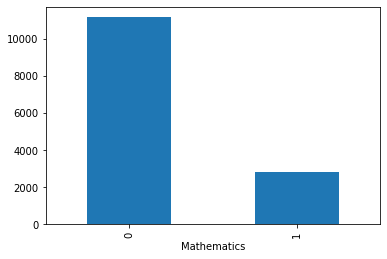

In [50]:
train.groupby('Mathematics').ABSTRACT.count().plot.bar(ylim=0)
plt.show()

In [51]:
physics = train.groupby('Physics')['Physics'].sum()
physics/len(train)*100

Physics
0     0.00000
1    27.53499
Name: Physics, dtype: float64

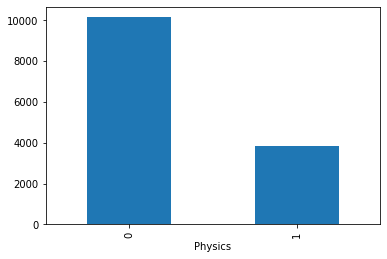

In [52]:
train.groupby('Physics').ABSTRACT.count().plot.bar(ylim=0)
plt.show()

In [53]:
statistics = train.groupby('Statistics')['Statistics'].sum()
statistics/len(train)*100

Statistics
0     0.000000
1    27.092259
Name: Statistics, dtype: float64

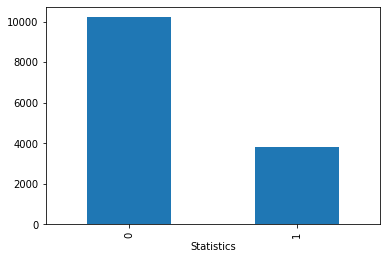

In [54]:
train.groupby('Statistics').ABSTRACT.count().plot.bar(ylim=0)
plt.show()

Preprocess data

In [55]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [56]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
train['processedtext'] = train['ABSTRACT'].apply(lambda x: html_parser.unescape(x))
test['processedtext'] = test['ABSTRACT'].apply(lambda x: html_parser.unescape(x))

In [57]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

stemmer = PorterStemmer()
words = stopwords.words("english")

train.processedtext = train.processedtext.astype(str)
train['processedtext'] = train['processedtext'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

test.processedtext = test.processedtext.astype(str)
test['processedtext'] = test['processedtext'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
#make all words lower case
train['processedtext'] = train['processedtext'].str.lower()
test['processedtext'] = test['processedtext'].str.lower()

# remove special characters, numbers, punctuations
train['processedtext'] = train['processedtext'].str.replace("[^a-zA-Z#]", " ")
test['processedtext'] = test['processedtext'].str.replace("[^a-zA-Z#]", " ")

#remove words less than 3 characters
train['processedtext'] = train['processedtext'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['processedtext'] = test['processedtext'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

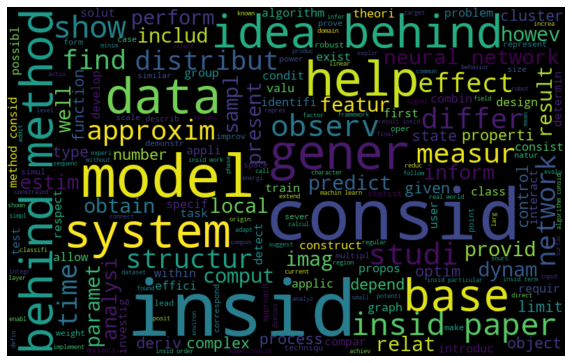

In [59]:
abstract_words = ' '.join([text for text in train['processedtext']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(abstract_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Define target

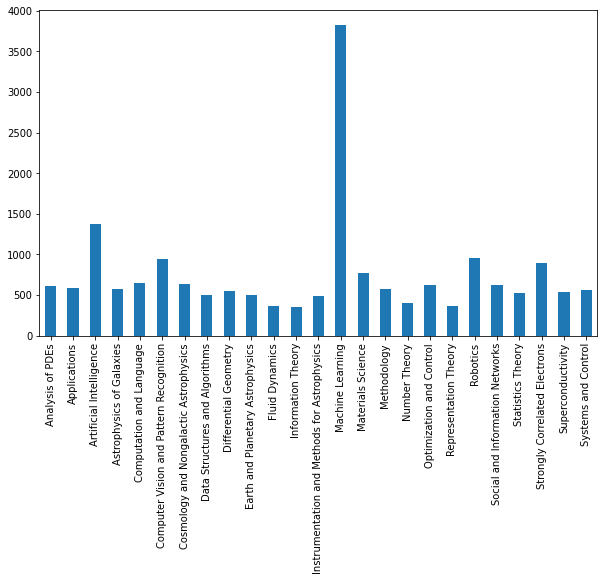

In [60]:
# Converting binary column to category
target = ['Analysis of PDEs', 'Applications', 'Artificial Intelligence','Astrophysics of Galaxies', 'Computation and Language', 'Computer Vision and Pattern Recognition',
          'Cosmology and Nongalactic Astrophysics', 'Data Structures and Algorithms', 'Differential Geometry', 'Earth and Planetary Astrophysics',
          'Fluid Dynamics', 'Information Theory', 'Instrumentation and Methods for Astrophysics', 'Machine Learning',
          'Materials Science', 'Methodology', 'Number Theory', 'Optimization and Control', 'Representation Theory', 'Robotics', 'Social and Information Networks',
          'Statistics Theory','Strongly Correlated Electrons', 'Superconductivity', 'Systems and Control' ]
y_data = train[target]

# Plot category data
plt.figure(figsize=(10,6))
y_data.sum(axis=0).plot.bar()
plt.show()


Define X, y and X_test

In [61]:
#define x, y and t_test
y = train[target]
X = train['processedtext']
X_test = test['processedtext']

Split train dataset for training and testing

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=555, shuffle=True)
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((12603,), (1401,), (12603, 25), (1401, 25))

Vextorize text

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english')
train_tfidf = vectorizer_tfidf.fit_transform(X_train.values.astype('U')).toarray()
val_tfidf = vectorizer_tfidf.transform(X_val.values.astype('U')).toarray()
test_tfidf = vectorizer_tfidf.transform(X_test.values.astype('U')).toarray()
print(vectorizer_tfidf.get_feature_names()[:10])

['aachen', 'aalen', 'aapm', 'aaronson', 'aatwistor', 'aavso', 'abalon', 'abandon', 'abat', 'abboud']


In [64]:
train_tfidf.shape, val_tfidf.shape, test_tfidf.shape

((12603, 20687), (1401, 20687), (6002, 20687))

Define and train model

In [65]:
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier

model = LinearSVC(class_weight='balanced',C=0.5)
models = MultiOutputClassifier(model)

Fit model

In [66]:
models.fit(train_tfidf, y_train)
print(models.score(train_tfidf, y_train))

0.6435769261286995


Make predictions on validation set

In [67]:
y_pred = models.predict(val_tfidf)
print(models.score(val_tfidf, y_val))
y_pred

0.3547466095645967


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.91      0.73        54
           1       0.43      0.54      0.48        79
           2       0.35      0.63      0.45       148
           3       0.71      0.92      0.80        49
           4       0.68      0.87      0.76        63
           5       0.58      0.79      0.67       107
           6       0.63      0.79      0.70        58
           7       0.45      0.65      0.53        46
           8       0.78      0.89      0.83        47
           9       0.85      0.76      0.81        38
          10       0.78      0.81      0.80        43
          11       0.62      0.72      0.67        36
          12       0.67      0.72      0.69        50
          13       0.70      0.83      0.76       398
          14       0.67      0.86      0.75        71
          15       0.43      0.64      0.51        55
          16       0.83      0.88      0.85        49
          17       0.38    

Make predictions on test set

In [69]:
prediction = models.predict(test_tfidf)
prediction

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

Prepare submission

In [70]:
submit = pd.DataFrame({'id': test.id, 'Analysis of PDEs': prediction[:,0],'Applications':prediction[:,1],'Artificial Intelligence':prediction[:,2],
                       'Astrophysics of Galaxies':prediction[:,3],'Computation and Language':prediction[:,4],'Computer Vision and Pattern Recognition':prediction[:,5],
                      'Cosmology and Nongalactic Astrophysics':prediction[:,6], 'Data Structures and Algorithms': prediction[:,7],'Differential Geometry': prediction[:,8],
                       'Earth and Planetary Astrophysics':prediction[:,9], 'Fluid Dynamics': prediction[:,10], 'Information Theory': prediction[:,11],
                       'Instrumentation and Methods for Astrophysics':prediction[:,12], 'Machine Learning': prediction[:,13], 'Materials Science': prediction[:,14], 
                       'Methodology': prediction[:,15], 'Number Theory':prediction[:,16], 'Optimization and Control':prediction[:,17], 'Representation Theory':prediction[:,18],
                       'Robotics':prediction[:,19], 'Social and Information Networks': prediction[:,20], 'Statistics Theory': prediction[:,21],
                       'Strongly Correlated Electrons':prediction[:,22], 'Superconductivity': prediction[:,23], 'Systems and Control': prediction[:,24] })
submit

,id,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,9409,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,17934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16071,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16870,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10496,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,11506,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5998,3418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5999,7369,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6000,8421,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0


In [71]:
submit.to_csv('submission.csv', index=False)